# Machine Learning "By Hand"

Recall from the previous lecture that the supervised machine learning task has four major components: 

1. The <font color="green"><i>predictor variables</i> $X$</font>. 
2. The <font color="gold"><i>target variable</i> $Y$</font>, which we aim to predict using <font color="green"> $X$</font>. 
3. The <font color="blue"> <i>model</i> $f$ </font>. We treat $\color{blue}{f}(\color{green}{X})$ as our estimate of $\color{gold}{Y}$. 
1. <font color="red"><i>The loss function</i> $\mathcal{L}$</font>. The quantity $\color{red}{\mathcal{L}}(\color{blue}{f}(\color{green}{X}), \color{gold}{Y})$ is a measure of how well the model $\color{blue}{f}$ "fits" the data $(\color{green}{X}, \color{gold}{Y})$. 

In this note, we will explore each of these components in an interpretable setting -- linear regression. This will help us understand what's really going on when we start using more complicated models from Python packages. 

## Linear Regression

In linear regression, we use a *linear* model for the data. In the 1-dimensional case, this means that our model $\color{blue}{f}$ has the form 

$$\color{blue}{f}(\color{green}{x}) = a\color{green}{x}+b \approx \color{gold}{y}\;.$$

There are two parameters: the slope $a$ and the intercept $b$. By changing the slope and intercept, we get different models. We say that $\color{blue}{f}$ belongs to a *family* of models $\color{blue}{\mathcal{M}}$, with each model corresponding to a different choice of $a$ and $b$. Our learning task now is to find good choices for $a$ and $b$, given some data. 

## Predictor and Target Data

Let's now generate some synthetic data to use as our example.

In [14]:
import numpy as np
from matplotlib import pyplot as plt

We will use a synthetic, randomly generated data set The following line seed our random number generator so we get the same thing every time

In [16]:
np.random.seed(1234)

This command ensures that the random numbers generated by NumPy's random functions are reproducible(可重复的). <br>
When you set the seed to a specific value, the sequence of numbers generated by any subsequent random number generation calls will be the same every time the code is run. 

Our data will be 100 points from the line y=x+1 plus a random error which we model as a normal random variable with standard deviation .2

In [3]:
a = 1
b = 1
n_points = 100

X = np.random.rand(n_points) # randomly generate 100 points, range is [0,1)
Y = a * X + b + 0.2 * np.random.randn(n_points)

Let's take a look at our data

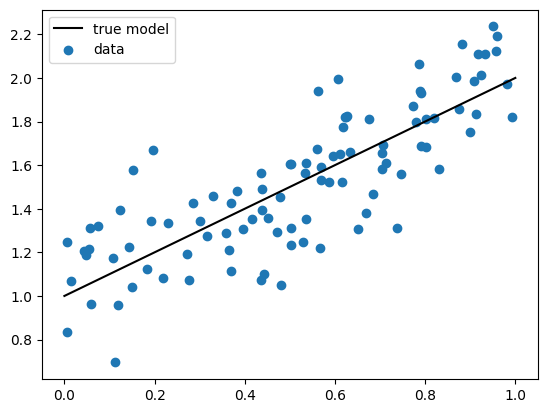

In [4]:
#plot points and true function

fig, ax = plt.subplots(1)


ax.plot([0, 1], [1, 2], color = "black", label = "true model")
ax.scatter(X, Y, label = "data")
ax.legend()

In practice, we don't actually know the true function. So our situtaion looks a bit more like this

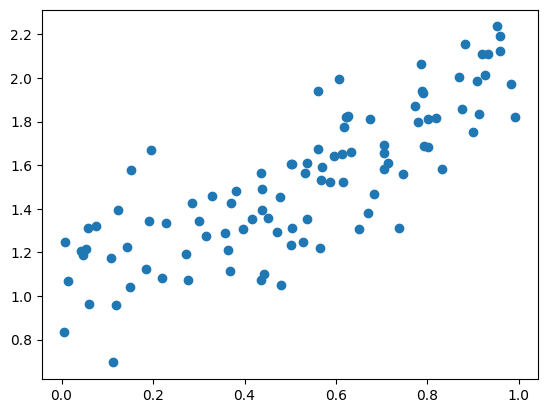

In [5]:
fig, ax = plt.subplots(1)
ax.scatter(X, Y, label = "data")

If we stare at the data, we can see that it kind of looks like we might be able to fit it with a line of the form 

Y=a*X+b

Let's use a function to formalize this model. When thinking about this conceptually we can regard X as the input and regard a and b as learnable parameters, but when we write the code they are all just input parameters

In [6]:
#LM stands for linear model
def LM(X, a, b):
    return a * X + b

Let's see how our model works against some data

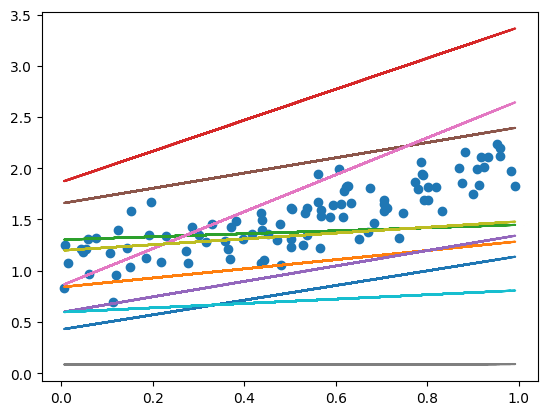

In [7]:
for i in range(10):
    #set a and b to be uniform between 0 and 2
    a = 2 * np.random.rand()
    b = 2 * np.random.rand()
    
    ax.plot(X, LM(X, a, b))
    
fig

Some of these <font color = "blue"> models </font> look better than others! How do we pick, systematically? Well, that's where the <font color="red"> loss function $\mathcal{L}$ </font> comes in. The most common choice in linear regression is the <font color="red"> <i> mean-square error</i></font>, which is defined as follows: 

$$\color{red}{\mathcal{L}}(\color{blue}{f}(\color{green}{X}),\color{gold}{Y}) = \frac{1}{n}\left[ (\color{gold}{y}_1 - \color{blue}{f}(\color{green}{x}_1))^2 + (\color{gold}{y}_2 - \color{blue}{f}(\color{green}{x}_2))^2 + \cdots + (\color{gold}{y}_n - \color{blue}{f}(\color{green}{x}_n))^2\right]$$

A term like $(\color{gold}{y}_i - \color{blue}{f}(\color{green}{x}_i))^2$ is large when $\color{blue}{f}(\color{green}{x}_i)$ is very different from $\color{gold}{y}_i$ -- that is, when our prediction is off! So, if a <font color="blue">model</font> has a low <font color="red">mean-square error </font>$\color{red}{\mathcal{L}}$, then this indicates that the <font color="blue">model</font> "fits the data" well. 

Let's implement the <font color="red">mean-square error</font> for linear regression.  The error depends on the parameters $a$ and $b$. `numpy` array operations make this very easy. 

In [8]:
def linear_MSE(X, Y, a, b):
    Error = Y - LM(X, a, b)
    return (Error**2).mean()

Now let's go back to our plot of the data, and show how all those candidate <font>models</font> fare with regards to the <font color="red">MSE loss function</font>. We're going to 

-  Make all of our lines black
-  tune our visualization so that the <font color="blue">models</font> with lower <font color="red">MSE</font> are drawn thicker:

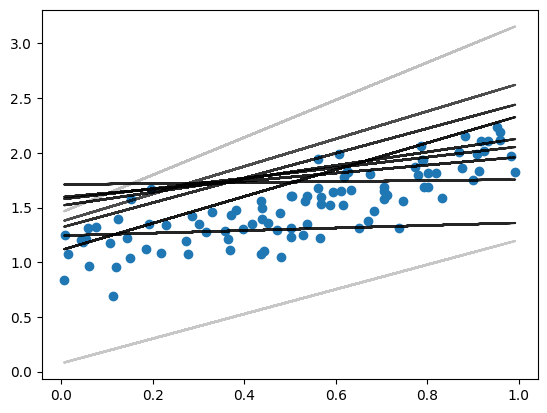

In [9]:
fig,ax = plt.subplots(1)
ax.scatter(X, Y)

for i in range(10):
    #a and b random between 0 and 2
    a = 2 * np.random.rand()
    b = 2 * np.random.rand()
    
    ax.plot(X, 
            LM(X, a, b),
            color = "black",
            alpha = max(0, 1 - linear_MSE(X, Y, a, b)) # adjust the transparency of line to indicate data accuracy
            )

Hey, this looks pretty good! The <font color="blue">models</font> that have lower <font color="red">MSE</font> (darker lines) "look close" to the data. 

Let's see if we can estimate $a$ and $b$. One way to do this is by simply generating a lot of random possibilities and picking the best one. Let's plot a number of models and highlight the best one in a different color.

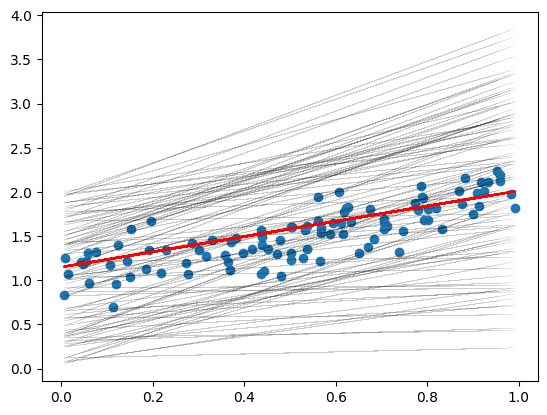

In [10]:
fig,ax = plt.subplots(1)
ax.scatter(X,Y)

#make 100 lines plot them, if error<best error perform update
best_error = np.inf
for i in range(100):
    
    a = 2 * np.random.rand()
    b = 2 * np.random.rand()
    preds = LM(X,a,b)
    error = linear_MSE(X,Y,a,b)
    
    ax.plot(X, preds,color = "black", alpha = 0.2, linewidth = 0.1)

    if error < best_error:
        best_error = error
        best_a = a
        best_b = b
        
best_preds = LM(X, best_a, best_b) 
ax.plot(X, best_preds, color = "red")
    

Now, lets check on the best_a and best_b __learned__ from the data. (Recall the true values are a=b=1)

In [11]:
best_a, best_b

(0.8636016969818487, 1.1484688275661288)

# Recap

In this note, we did linear regression "by hand." We generated some synthetic <font color="green">predictor data</font> and <font color="gold">target data</font>. We then modeled the data using a family of one-dimensional <font color="blue"> linear models</font>, and selected from among the many possibilities using the <font color="red">mean square error loss function</font>. Choosing the <font color="blue">model </font> that minimized the <font color="red">loss function</font> led to a good "fit" to the data. 

This pattern applies to essentially all problems in (supervised) machine learning: 

1. Collect some <font color="green">predictor data</font> and <font color="gold">target data</font>. 
2. Define a family of <font color="blue">models</font> and <font color="red">loss function</font>.  
3. Find the element of the <font color="blue">model family</font> that minimizes the <font color="red">loss function</font>. 

There are a few outstanding issues that we haven't covered here. The biggest one is that "fitting the data" is not actually what we usually care about -- we care about *predicting* unseen data. It turns out that fitting the data too closely can actually be counter productive in this case. This is the problem of *overfitting*, which we'll consider in a future lecture. 

## Bonus material
In the above example, we just picked a bunch of different a's and b's completely at random. We did this, because it is simple, but it is not what you would do in practice. Without getting to much into the weeds, here is what you would do in practice.

### Conceptual - Gradient Descent

1) Start with a initial guesses a_0, b_0.

2) Based on how your model works with a_0 and b_0, come up with another guess a_1 and b_1 which are better than the initial guess

3) Repeat this processs so that a_2,b_2 are better than a_1,b_1, and a_3,b_3 are even better than a_2,b_2,...

4) Don't stop until your model is sufficiently good

If you have taken calculus (not required) this might remind you of Newton's method for solving equations. Indeed, the rule for getting a "better guess" relies on taking the derivative of the loss function and doing some calculus. The name for this procedure is Gradient Descent.



### Practical - Scipy.optimize

In [12]:
from scipy.optimize import minimize
res = minimize(lambda z: linear_MSE(X, Y, z[0], z[1]), np.array([0,0]))
best_a, best_b = res.x
best_a, best_b

(0.976529904157296, 1.0152617349077613)

This is exactly what is going on "under the hood" of most prepackaged machine learning algorithms, which we'll begin to see in the next few lectures. 

Having obtained the optimal parameters, we are now able to make predictions on unseen data. For example: 

In [13]:
LM(np.array([0.7]), best_a, best_b) # model prediction when X = 0.7

array([1.69883267])